# Create a growing time series using Matplotlib

* read in data
* sort out x and y
* define animation function for each point
* call animator
* save as a GIF image

In [1]:
import xarray as xr
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/\
Amon/r1i1p1/v20130325/tasmax/tasmax_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc'
f = xr.open_dataset(url)

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# Canberra 
timeseries = f.tasmax.sel(lon=149.13,lat=-35.28,method='nearest')
timeseries

<xarray.DataArray 'tasmax' (time: 1872)>
array([301.31274, 300.5162 , 299.14127, ..., 297.92596, 298.66644, 300.4304 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
    lat      float64 -35.0
    lon      float64 150.0
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           monthly mean of the daily-maximum near-surface air tem...
    units:             K
    cell_methods:      time: maximum within days time: mean over days
    cell_measures:     area: areacella
    history:           2013-03-25T05:03:31Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [3]:
x = range(1, len(timeseries.time)+1)
y = timeseries.values

MovieWriter imagemagick unavailable. Trying to use pillow instead.


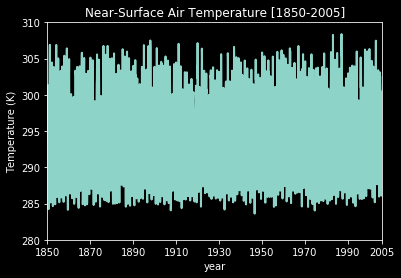

In [11]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')


fig = plt.figure() 
ax = plt.axes(xlim=(1, len(x)), ylim=(280, 310)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 

    # x, y values to be plotted 
    x1 = x[i] 
    y1 = y[i] 

   # appending new points to x, y axes points list 
    xdata.append(x1) 
    ydata.append(y1) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Near-Surface Air Temperature [1850-2005] from CMIP5') 
# hiding the axis details 
plt.axis('on') 
plt.ylabel('Temperature (K)')
plt.xlabel('year')
plt.xticks([0,240,480,720,960,1200,1440,1680,1872], 
           ['1850', '1870', '1890','1910','1930','1950','1970','1990','2005'])

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=len(x), interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('timeseries.gif',writer='imagemagick') 